# Intro. to ML

#### My first ML_model - Prediction of House Prices

In [1]:
import pandas as pd
import numpy as np

In [3]:
# Generate synthetic data
data = {'Size': [1400, 1600, 1700, 1875, 1100],
        'Price': [245000, 312000, 279000, 308000, 199000]} # in dollars

# creating a dataframe
df = pd.DataFrame(data)


In [7]:
# Splitting the data into X (independent) and y (dependent) variables
X = df[['Size']] # independent variable
y = df['Price'] # dependent variable

In [18]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0) # 80% training and 20% testing data split. Random_state is used to set the seed for random number generator. This can be any integer.

print(X_train)
print(X_test)

print(y_train)
print(y_test)


   Size
0  1400
1  1600
3  1875
4  1100
   Size
2  1700
0    245000
1    312000
3    308000
4    199000
Name: Price, dtype: int64
2    279000
Name: Price, dtype: int64


In [ ]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train) # fitting the model on training data

LinearRegression()

In [19]:
# Making predictions
y_pred = model.predict(X_test) # predicting the values of y for the test data

print(y_pred) # predicted values of y

[297696.73330083]


In [22]:
# Evaluating the model
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE is the square root of the mean of the squared errors. It is the most popular evaluation metric used in regression problems.

Mean Absolute Error: 18696.73330082884
Mean Squared Error: 349567836.12232214
Root Mean Squared Error: 18696.73330082884


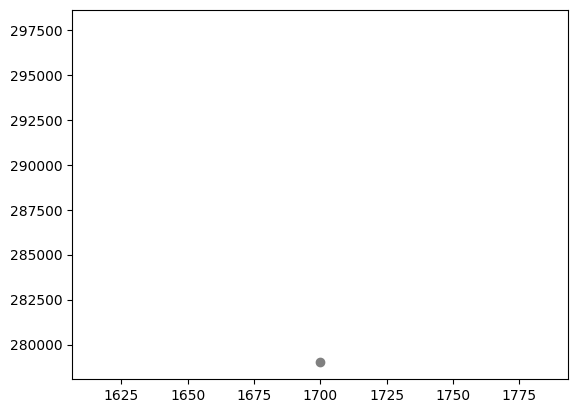

In [13]:
# Visualizing the model
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show() # The grey dots represent the actual values of y in the test data, and the red line represents the predicted values of y by the model. The line is the best fit line that minimizes the sum of squared errors.
